<a href="https://colab.research.google.com/github/estelacruz/Data-Alchemist/blob/main/PartFive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 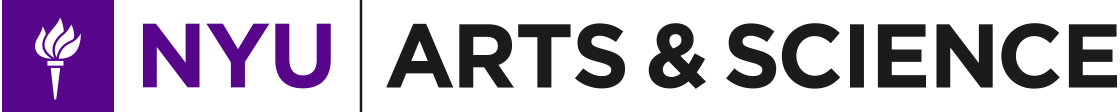



---



**Data Management & Analysis**


**Estela Bobadilla-Cruz**


---










In [ ]:
#pandas sql
!pip install pandasql


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=17d8b529504b7c5649649e8391acf66caac79d3f3d165d0f9f4bd103bc5cf0d0
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


**Task 1:** Use that data to create a set of related tables in SQLite. 

The main table computer_scientists should contain id, last, first, birth, death. 

There should also be tables for contribs and awards. 

The computer_scientists table should be linked to the other two tables via one-to-many relationships, each of which should be represented in another table, for a total of five tables. 

Enforce foreign key constraints by adding them to your “CREATE TABLE” statements. What is the average number of awards per scientist?

In [ ]:
import json
import pymongo
import pprint
from google.colab import files #download cleaned up version of bios.json file, will include in HW Submission
uploaded = files.upload()

Saving bios.json to bios.json


In [ ]:
#Storing Bios as a dict

#get file content by its values
biosData = next(iter(uploaded.values()))
#convert json string into dict
bios =  json.loads(biosData)
#type(bios)
#bios

#for x in range(len(bios)):
    #print(type(bios[x])) #<class 'dict'>
    #print(bios[x])

#print(bios[0].keys())

In [ ]:
# install MongoDB on Colab
!apt install mongodb
# start the service
!service mongodb start

# import and start pymongo
from pymongo import MongoClient
client = MongoClient()
client.list_database_names() # ['admin', 'local']

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libpcap0.8 libstemmer0d libyaml-cpp0.5v5 mongo-tools mongodb-clients
  mongodb-server mongodb-server-core
The following NEW packages will be installed:
  libpcap0.8 libstemmer0d libyaml-cpp0.5v5 mongo-tools mongodb mongodb-clients
  mongodb-server mongodb-server-core
0 upgraded, 8 newly installed, 0 to remove and 20 not upgraded.
Need to get 53.1 MB of archives.
After this operation, 215 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpcap0.8 amd64 1.8.1-6ubuntu1.18.04.2 [118 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libstemmer0d amd64 0+svn585-1build1 [62.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 lib

['admin', 'local']

In [ ]:
# create a database called "mongoDB_ex"; python variable db points to it.
db=client['mongoDB_ex']


**Subtask:** Use that data to create a set of related tables in SQLite. 

The main table computer_scientists should contain id, last, first, birth, death. 


In [ ]:
# within "mongoDB-ex", create bios collection/table called "computer_scientists"
computer_scientists = db['computer_scientists']
db.computer_scientists.delete_many({})
# contains id, last, first, birth, death. 

In [ ]:
#list of dire
cs = [] 

csPerson = {}

for x in range(len(bios)):
    #print(type(bios[x])) #<class 'dict'>
    #print(bios[x])
    csPerson['_id'] = bios[x]['_id']
    csPerson['first'] = bios[x]['name']['first']
    csPerson['last'] = bios[x]['name']['last']



    #print(bios[x]['name']['first'])
    #print(bios[x]['name']['last'])
    #print(bios[x]['birth'])
    if ('birth' in bios[x].keys() ):

      csPerson['birth'] = bios[x]['birth']
      #print(bios[x]['birth'])
    else:
      #default
      csPerson['birth'] = None
      
    
    if ('death' in bios[x].keys() ):
      csPerson['death'] = bios[x]['death']
      #print(bios[x]['death'])
    else:
      csPerson['death'] = None
    
    #append to list of dir
    cs.append(csPerson)
    csPerson = {}
  
cs
 

[{'_id': 1,
  'first': 'John',
  'last': 'Backus',
  'birth': '1924-12-03',
  'death': '2007-03-17'},
 {'_id': 2,
  'first': 'John',
  'last': 'McCarthy',
  'birth': '1927-09-04',
  'death': '2011-12-24'},
 {'_id': 3,
  'first': 'Grace',
  'last': 'Hopper',
  'birth': '1906-12-09',
  'death': '1992-01-01'},
 {'_id': 4,
  'first': 'Kristen',
  'last': 'Nygaard',
  'birth': '1926-08-27',
  'death': '2002-08-10'},
 {'_id': 5,
  'first': 'Ole-Johan',
  'last': 'Dahl',
  'birth': '1931-10-12',
  'death': '2002-06-29'},
 {'_id': 6,
  'first': 'Guido',
  'last': 'van Rossum',
  'birth': '1956-01-31',
  'death': None},
 {'_id': 7,
  'first': 'Dennis',
  'last': 'Ritchie',
  'birth': '1941-09-09',
  'death': '2011-10-12'},
 {'_id': 8,
  'first': 'Yukihiro',
  'last': 'Matsumoto',
  'birth': '1965-04-14',
  'death': None},
 {'_id': 9,
  'first': 'James',
  'last': 'Gosling',
  'birth': '1955-05-19',
  'death': None},
 {'_id': 10,
  'first': 'Martin',
  'last': 'Odersky',
  'birth': None,
  'deat

In [ ]:
#insert list of dir into computer sci collections
#_id is primary key by default
db.computer_scientists.insert_many(cs)

In [ ]:
#checking insert
for i in db.computer_scientists.find({}):
  print(i)

{'_id': 1, 'first': 'John', 'last': 'Backus', 'birth': '1924-12-03', 'death': '2007-03-17'}
{'_id': 2, 'first': 'John', 'last': 'McCarthy', 'birth': '1927-09-04', 'death': '2011-12-24'}
{'_id': 3, 'first': 'Grace', 'last': 'Hopper', 'birth': '1906-12-09', 'death': '1992-01-01'}
{'_id': 4, 'first': 'Kristen', 'last': 'Nygaard', 'birth': '1926-08-27', 'death': '2002-08-10'}
{'_id': 5, 'first': 'Ole-Johan', 'last': 'Dahl', 'birth': '1931-10-12', 'death': '2002-06-29'}
{'_id': 6, 'first': 'Guido', 'last': 'van Rossum', 'birth': '1956-01-31', 'death': None}
{'_id': 7, 'first': 'Dennis', 'last': 'Ritchie', 'birth': '1941-09-09', 'death': '2011-10-12'}
{'_id': 8, 'first': 'Yukihiro', 'last': 'Matsumoto', 'birth': '1965-04-14', 'death': None}
{'_id': 9, 'first': 'James', 'last': 'Gosling', 'birth': '1955-05-19', 'death': None}
{'_id': 10, 'first': 'Martin', 'last': 'Odersky', 'birth': None, 'death': None}


**Subtask:**

There should also be tables for contribs and awards. 


The computer_scientists table should be linked to the other two tables via one-to-many relationships, each of which should be represented in another table, for a total of five tables. 




In [ ]:
#list of dire
contribsL = [] 

contrib = {}

for x in range(len(bios)):
    #print(type(bios[x])) #<class 'dict'>
    #print(bios[x])
    contrib['_id'] = bios[x]['_id']
    contrib['first'] = bios[x]['name']['first']
    contrib['last'] = bios[x]['name']['last']


    contrib['contribs'] = bios[x]['contribs']
    contrib['numContribs'] = len(bios[x]['contribs'])
    #print(len(bios[x]['contribs']))

    contribsL.append(contrib)
    contrib = {}
#contribsL
 

In [ ]:
# within "mongoDB-x", create a collection/table called "contribs"
contribs = db['contribs']
db.contribs.delete_many({})

In [ ]:
#insert list of dir into contribs collections
db.contribs.insert_many(contribsL)

In [ ]:
#checking insert
for i in db.contribs.find({}):
  print(i)

{'_id': 1, 'first': 'John', 'last': 'Backus', 'contribs': ['Fortran', 'ALGOL', 'Backus-Naur Form', 'FP'], 'numContribs': 4}
{'_id': 2, 'first': 'John', 'last': 'McCarthy', 'contribs': ['Lisp', 'Artificial Intelligence', 'ALGOL'], 'numContribs': 3}
{'_id': 3, 'first': 'Grace', 'last': 'Hopper', 'contribs': ['UNIVAC', 'compiler', 'FLOW-MATIC', 'COBOL'], 'numContribs': 4}
{'_id': 4, 'first': 'Kristen', 'last': 'Nygaard', 'contribs': ['OOP', 'Simula'], 'numContribs': 2}
{'_id': 5, 'first': 'Ole-Johan', 'last': 'Dahl', 'contribs': ['OOP', 'Simula'], 'numContribs': 2}
{'_id': 6, 'first': 'Guido', 'last': 'van Rossum', 'contribs': ['Python'], 'numContribs': 1}
{'_id': 7, 'first': 'Dennis', 'last': 'Ritchie', 'contribs': ['UNIX', 'C'], 'numContribs': 2}
{'_id': 8, 'first': 'Yukihiro', 'last': 'Matsumoto', 'contribs': ['Ruby'], 'numContribs': 1}
{'_id': 9, 'first': 'James', 'last': 'Gosling', 'contribs': ['Java'], 'numContribs': 1}
{'_id': 10, 'first': 'Martin', 'last': 'Odersky', 'contribs': [

**Subtask:**

What is the average number of awards per scientist?


In [ ]:
#list of dire
awardsList = [] 

award = {}

for x in range(len(bios)):
    #print(type(bios[x])) #<class 'dict'>
    #print(bios[x])

    award['_id'] = bios[x]['_id']
    
    award['first'] = bios[x]['name']['first']
    award['last'] = bios[x]['name']['last']


  
    if ('awards' in bios[x].keys() ):

      award['awards'] = bios[x]['awards']
      award['numAwards'] = len(bios[x]['awards'])
      
      #print(bios[x]['awards'])
      #print(len(bios[x]['awards']))
    else:
      #
      award['awards'] = None
      award['numAwards'] = 0
    
    awardsList.append(award)
    award = {}
  
      
#awardsList


In [ ]:
# within "mongoDB-x", create a collection/table called "awards"
awards = db['awards']
db.awards.delete_many({})

In [ ]:
#insert list of dir into awards collections
db.awards.insert_many(awardsList)

In [ ]:
#checking insert
for i in db.awards.find({}):
  print(i)

{'_id': 1, 'first': 'John', 'last': 'Backus', 'awards': [{'award': 'W.W. McDowell Award', 'year': 1967, 'by': 'IEEE Computer Society'}, {'award': 'National Medal of Science', 'year': 1975, 'by': 'National Science Foundation'}, {'award': 'Turing Award', 'year': 1977, 'by': 'ACM'}, {'award': 'Draper Prize', 'year': 1993, 'by': 'National Academy of Engineering'}], 'numAwards': 4}
{'_id': 2, 'first': 'John', 'last': 'McCarthy', 'awards': [{'award': 'Turing Award', 'year': 1971, 'by': 'ACM'}, {'award': 'Kyoto Prize', 'year': 1988, 'by': 'Inamori Foundation'}, {'award': 'National Medal of Science', 'year': 1990, 'by': 'National Science Foundation'}], 'numAwards': 3}
{'_id': 3, 'first': 'Grace', 'last': 'Hopper', 'awards': [{'award': 'Computer Sciences Man of the Year', 'year': 1969, 'by': 'Data Processing Management Association'}, {'award': 'Distinguished Fellow', 'year': 1973, 'by': ' British Computer Society'}, {'award': 'W. W. McDowell Award', 'year': 1976, 'by': 'IEEE Computer Society'},

In [ ]:
# two other tables: Tables tells us about the birth and death date of the computer scientist, 
# these tables only need the primary key of all other tables, 'id' but they include more info as well
#_id field is reserved for primary key in mongodb

#list of dire
bdates = [] 
bdate = {}

for x in range(len(bios)):
    #print(type(bios[x])) #<class 'dict'>
    #print(bios[x])
    bdate['_id'] = bios[x]['_id']
    bdate['first'] = bios[x]['name']['first']
    bdate['last'] = bios[x]['name']['last']


    if ('birth' in bios[x].keys() ):
      bdate['birth'] = bios[x]['birth']
      #print(bios[x]['birth'])
    else:
      #default
      bdate['birth'] = None
      
    
    #append
    bdates.append(bdate)
    bdate = {}

bdates


 

[{'_id': 1, 'first': 'John', 'last': 'Backus', 'birth': '1924-12-03'},
 {'_id': 2, 'first': 'John', 'last': 'McCarthy', 'birth': '1927-09-04'},
 {'_id': 3, 'first': 'Grace', 'last': 'Hopper', 'birth': '1906-12-09'},
 {'_id': 4, 'first': 'Kristen', 'last': 'Nygaard', 'birth': '1926-08-27'},
 {'_id': 5, 'first': 'Ole-Johan', 'last': 'Dahl', 'birth': '1931-10-12'},
 {'_id': 6, 'first': 'Guido', 'last': 'van Rossum', 'birth': '1956-01-31'},
 {'_id': 7, 'first': 'Dennis', 'last': 'Ritchie', 'birth': '1941-09-09'},
 {'_id': 8, 'first': 'Yukihiro', 'last': 'Matsumoto', 'birth': '1965-04-14'},
 {'_id': 9, 'first': 'James', 'last': 'Gosling', 'birth': '1955-05-19'},
 {'_id': 10, 'first': 'Martin', 'last': 'Odersky', 'birth': None}]

In [ ]:
birthday = db['birthday']
db.birthday.delete_many({})

#insert list of dir into awards collections
db.birthday.insert_many(bdates)

#checking insert
for i in db.birthday.find({}):
  print(i)

{'_id': 1, 'first': 'John', 'last': 'Backus', 'birth': '1924-12-03'}
{'_id': 2, 'first': 'John', 'last': 'McCarthy', 'birth': '1927-09-04'}
{'_id': 3, 'first': 'Grace', 'last': 'Hopper', 'birth': '1906-12-09'}
{'_id': 4, 'first': 'Kristen', 'last': 'Nygaard', 'birth': '1926-08-27'}
{'_id': 5, 'first': 'Ole-Johan', 'last': 'Dahl', 'birth': '1931-10-12'}
{'_id': 6, 'first': 'Guido', 'last': 'van Rossum', 'birth': '1956-01-31'}
{'_id': 7, 'first': 'Dennis', 'last': 'Ritchie', 'birth': '1941-09-09'}
{'_id': 8, 'first': 'Yukihiro', 'last': 'Matsumoto', 'birth': '1965-04-14'}
{'_id': 9, 'first': 'James', 'last': 'Gosling', 'birth': '1955-05-19'}
{'_id': 10, 'first': 'Martin', 'last': 'Odersky', 'birth': None}


In [ ]:
# Table tells us death date
#list of dire
dates = [] 
date = {}

for x in range(len(bios)):
    #print(type(bios[x])) #<class 'dict'>
    #print(bios[x])
    date['_id'] = bios[x]['_id']
    date['first'] = bios[x]['name']['first']
    date['last'] = bios[x]['name']['last']


       
    if ('death' in bios[x].keys() ):
      date['death'] = bios[x]['death']
      #print(bios[x]['death'])
    else:
      date['death'] = None
    
    #append
    dates.append(date)
    date = {}

dates


 

[{'_id': 1, 'first': 'John', 'last': 'Backus', 'death': '2007-03-17'},
 {'_id': 2, 'first': 'John', 'last': 'McCarthy', 'death': '2011-12-24'},
 {'_id': 3, 'first': 'Grace', 'last': 'Hopper', 'death': '1992-01-01'},
 {'_id': 4, 'first': 'Kristen', 'last': 'Nygaard', 'death': '2002-08-10'},
 {'_id': 5, 'first': 'Ole-Johan', 'last': 'Dahl', 'death': '2002-06-29'},
 {'_id': 6, 'first': 'Guido', 'last': 'van Rossum', 'death': None},
 {'_id': 7, 'first': 'Dennis', 'last': 'Ritchie', 'death': '2011-10-12'},
 {'_id': 8, 'first': 'Yukihiro', 'last': 'Matsumoto', 'death': None},
 {'_id': 9, 'first': 'James', 'last': 'Gosling', 'death': None},
 {'_id': 10, 'first': 'Martin', 'last': 'Odersky', 'death': None}]

In [ ]:
deathday = db['deathday']
db.deathday.delete_many({})

#insert list of dir into awards collections
db.deathday.insert_many(dates)

#checking insert
for i in db.deathday.find({}):
  print(i)

{'_id': 1, 'first': 'John', 'last': 'Backus', 'death': '2007-03-17'}
{'_id': 2, 'first': 'John', 'last': 'McCarthy', 'death': '2011-12-24'}
{'_id': 3, 'first': 'Grace', 'last': 'Hopper', 'death': '1992-01-01'}
{'_id': 4, 'first': 'Kristen', 'last': 'Nygaard', 'death': '2002-08-10'}
{'_id': 5, 'first': 'Ole-Johan', 'last': 'Dahl', 'death': '2002-06-29'}
{'_id': 6, 'first': 'Guido', 'last': 'van Rossum', 'death': None}
{'_id': 7, 'first': 'Dennis', 'last': 'Ritchie', 'death': '2011-10-12'}
{'_id': 8, 'first': 'Yukihiro', 'last': 'Matsumoto', 'death': None}
{'_id': 9, 'first': 'James', 'last': 'Gosling', 'death': None}
{'_id': 10, 'first': 'Martin', 'last': 'Odersky', 'death': None}


**End Of Task 1:** What is the average number of awards per scientist?

In [ ]:
avgAwards = 0
csCount = 0 #known to be 10, but will count
for i in db.awards.find({}):
  avgAwards += i['numAwards']
  csCount += 1

avgAwards = round(avgAwards/csCount, 2)

#avgAwards #the average number of awards per scientist is 2.5

**---------The remaining questions are based on the ReadyChef database (readychef.db)---------**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') #to import readchef.db

Mounted at /content/gdrive


In [ ]:

from sqlalchemy import create_engine
import pandas as pd
sqlconnect = create_engine("sqlite:////content/gdrive/MyDrive/readychef.db")
tables = sqlconnect.execute('''select name from sqlite_master where type = 'table' ''')
#for x in tables:
  #print(x)

def execSQL(conn,query):
  conn.execute(query) # execute an SQL query
  conn.commit() # "commit" that query in order to make its action permanent

def allrowsSelect(conn,query):
  cursor = conn.execute(query)
  C = 0
  for row in cursor:
   print(row)
   C = C + 1
  print(C)
#Using the invoices table, find out the BillingCity in the United Kingdom that has the second most invoices
#invoice id, customer id
#allrowsSelect(sqlconnect, "SELECT *, COUNT(BillingCity) FROM 'invoices' WHERE BillingCountry = 'United Kingdom' GROUP BY BillingCity")
# Edinburgh, UK that has the second most invoices: 7 invoices


**Task 2:** What is the user id of the user that visited the site most frequently?

In [ ]:
import sqlite3
conn_sql= sqlite3.connect("/content/gdrive/MyDrive/readychef.db")
#for x in tables:
  #print(x)



In [ ]:
#visits = pd.read_sql_query("SELECT * FROM 'visits'", conn_sql)
numvisits = pd.read_sql_query("SELECT userid, COUNT(dt) as countVisits FROM visits GROUP BY userid ORDER BY countVisits DESC", conn_sql)

numvisits['userid'][0] #userid 50 visited the site most frequently


#SELECT userid, COUNT(dt) as countVisits FROM visits GROUP BY userid ORDER BY countVisits DESC
#double check: SELECT * FROM visits WHERE userid = 50

50

**Task 3:** What is the average cost of Chinese meals in the meals table, rounded to two decimal places?


In [ ]:
meals = pd.read_sql_query("SELECT * FROM 'meals'", conn_sql)
mealAvgPrices = pd.read_sql_query("SELECT type, ROUND(AVG(price), 2) AS avgCost FROM meals GROUP BY type", conn_sql)
cavg = pd.read_sql_query("SELECT type, ROUND(AVG(price), 2) AS avgCost FROM meals WHERE type = 'chinese' ", conn_sql)
cavg['avgCost'][0] # the average cost of Chinese meals is $9.52

#SELECT type, ROUND(AVG(price), 2) AS avgCost FROM meals WHERE type = 'chinese' 
#SELECT type, ROUND(AVG(price), 2) AS avgCost FROM meals GROUP BY type

9.52

**Task 4:** What user bought the most meals?


In [ ]:
events= meals = pd.read_sql_query("SELECT * FROM 'events'", conn_sql)

mealsBought = pd.read_sql_query("SELECT userid, COUNT(event) AS mealsBought FROM events WHERE event = 'bought' GROUP BY userid ORDER BY mealsBought DESC", conn_sql)
#mealsBought
#mealsBought['userid'][0]
#mealsBought['mealsBought'][0]

print("userid", mealsBought['userid'][0], "bought the most meals. In total, they bought", mealsBought['mealsBought'][0], "meals")

#double checking
#t = events[events['event']=='bought']
#len(t[t['userid']==129]) 


#SELECT userid, COUNT(event) AS mealsBought FROM events WHERE event = 'bought' GROUP BY userid ORDER BY mealsBought DESC

userid 129 bought the most meals. In total, they bought 101 meals


**Task 5:** Quite a few users are tied for the most other users referred. For these top referrers, what is the number of other users referred?


In [ ]:
ref = pd.read_sql_query("SELECT * FROM 'referrals'", conn_sql)

#2157 rows × 2 columns

refCount = pd.read_sql_query("SELECT referred_by, COUNT(referred) AS refCount FROM referrals GROUP BY referred_by ORDER BY refCount DESC", conn_sql)

#ref
#refCount['refCount'][0]

print("Top referrers referred", refCount['refCount'][0], "other users" )

Top referrers referred 6 other users


**Task 6:**  What type of meal was most frequently shared by the user who bought the most meals?


In [ ]:

q = '''

SELECT type FROM meals WHERE meal_id =
(

SELECT meal_id FROM 
(

SELECT meal_id, COUNT(meal_id) AS mealCount FROM
(SELECT  event, userid, meal_id FROM events WHERE userid = 129 AND event = 'share')
GROUP BY meal_id ORDER BY mealCount DESC LIMIT 1
)

)

'''

mostSharedType = pd.read_sql_query(q, conn_sql)
mostSharedType['type'][0]
print(mostSharedType['type'][0], "was the type of meal that was most frequently shared by the user who bought the most meals")

japanese was the type of meal that was most frequently shared by the user who bought the most meals


**Task 7:** Using a window function, assign a quintile from 1 to 5 to each meal based on the
price with quintile 1 having the highest price and quintile 5 the lowest. What is the lowest price in quintile 3?


In [ ]:
query_for_task7 = '''
SELECT MIN(price)
FROM (
  SELECT meal_id, type, date, price,
         NTILE(5) OVER(ORDER BY price DESC) AS quintile
  FROM meals
) AS t
WHERE quintile = 3

'''

#10 is the lowest price in quintile 3

**Task 8:** Using a window function, create a view that has the following columns: userid, current_order_date, current_meal_type, and next_meal_type. This should be based on partitioning by user and ordering by date for the meals each user bought. For each date that the user bought a meal, the next_meal_type should contain the type of the next meal that they bought, chronologically. Query this view to find the types of the first three meals bought by user 2.




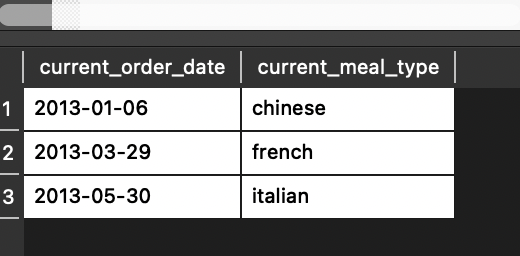



In [ ]:
t8 = '''
CREATE VIEW taskView AS
SELECT userid, events.dt AS current_order_date, type AS current_meal_type,
       LAG(type) OVER(PARTITION BY userid ORDER BY date(events.dt)) AS next_meal_type
FROM meals
INNER JOIN events
ON meals.meal_id = events.meal_id
WHERE events.event = 'bought'
'''
t8Query = '''
SELECT current_order_date, current_meal_type
FROM taskView
WHERE userid = 2
ORDER BY current_order_date
LIMIT 3

'''

#chinese, french, italian

**Task 9:** Find the average price for each type of meal using a window function and add it to the table without reducing the number of meals. Then find the difference in price between each meal and the average of that type. What is this value for the cheapest Italian meal (that is, how much less is it than the average)?

meals contains the meal_ids, 'type', and 'price'


In [ ]:
tq1 = '''

CREATE VIEW taskNine AS
SELECT meal_id, type, price,
    AVG(price) OVER (PARTITION BY type) AS avgPrice,
    AVG(price) OVER (PARTITION BY type) - price AS diff
FROM meals

'''
#the cheapest Italian meal is meal_id 11, price = $7, where the avgPrice for type italian is $11.29( that is, it is $4.29 less than the average)
tq2 = '''
SELECT meal_id, type, price, avgPrice, diff
FROM taskNine
WHERE type =  'italian'
ORDER BY diff DESC

'''